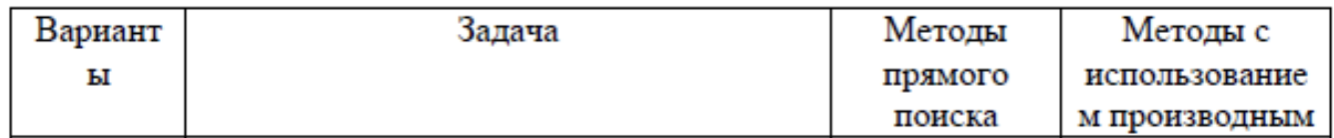

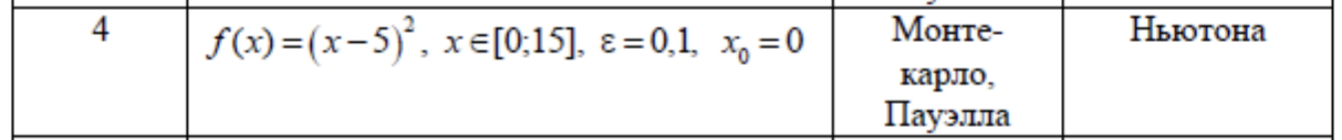

- 1 В соответствии с вашим вариантом постройте график функции.
- 2 Напишите программу определения минимума функции с использованием методов
прямого поиска (см.вариант). Вывод промежуточных итераций обязателен.
- 3 Напишите программу определения минимума функции с использованием методов с
применением производных (см. вариант). Вывод промежуточных итераций обязателен.
- 4 Для каждого метода выполните три итерации вручную. Для выполнения задания могут быть использованы языки программирования (С++, Python,
Pascal, и др.). Недостающие данные выберите сами.
Не используйте пакеты прикладных программ!!! Пишем программу на одном их языков
программирования.
- 5 Сравните методы по числу итераций.

Прямые методы используют значения функции в вычисленных функциях.

Методы первого порядка используют значение или знак производной функции в вычисленных точках

## График функции

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def f(x):
    return (x-5)**2

In [91]:
y_values = []
x_values = []
for x in np.arange(0.0, 15.1, 0.1):
    x_values.append(x)
    y = f(x)
    y_values.append(y)

for i in range(len(x_values)):
    print(f'Значение функции f = {y_values[i]} при x = {x_values[i]}')

Значение функции f = 25.0 при x = 0.0
Значение функции f = 24.010000000000005 при x = 0.1
Значение функции f = 23.04 при x = 0.2
Значение функции f = 22.090000000000003 при x = 0.30000000000000004
Значение функции f = 21.159999999999997 при x = 0.4
Значение функции f = 20.25 при x = 0.5
Значение функции f = 19.360000000000003 при x = 0.6000000000000001
Значение функции f = 18.49 при x = 0.7000000000000001
Значение функции f = 17.64 при x = 0.8
Значение функции f = 16.81 при x = 0.9
Значение функции f = 16.0 при x = 1.0
Значение функции f = 15.209999999999999 при x = 1.1
Значение функции f = 14.44 при x = 1.2000000000000002
Значение функции f = 13.690000000000001 при x = 1.3
Значение функции f = 12.959999999999997 при x = 1.4000000000000001
Значение функции f = 12.25 при x = 1.5
Значение функции f = 11.559999999999999 при x = 1.6
Значение функции f = 10.889999999999999 при x = 1.7000000000000002
Значение функции f = 10.240000000000002 при x = 1.8
Значение функции f = 9.609999999999998 п

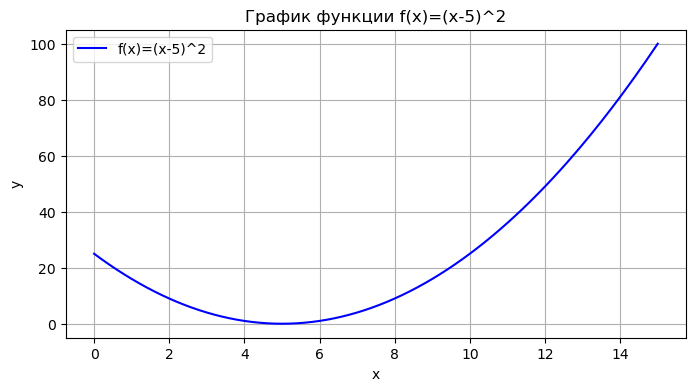

In [92]:
plt.figure(figsize=(8, 4))

plt.plot(x_values, y_values, label ='f(x)=(x-5)^2', color='blue')
plt.title('График функции f(x)=(x-5)^2')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.legend() 
plt.show()

## Метод прямого поиска Пауэлла

Суть метода: определить три точки в направлении уменьшения функции и рассчитать аппроксимацию. Сравнить значение функции в наилучшей из трех точек и в точке квадратичной аппроксимации и если условие останова не выполняется, то выбирается наилучшая точка и две точки по обе стороны от неё.

In [93]:
def quadratic_approximation(x1, f1, x2, f2, x3, f3):
    a1 = (f(x2)-f(x1))/(x2-x1)
    a2 = (((f(x3)-f(x1))/(x3-x1)) - ((f(x2)-f(x1))/(x2-x1)))/(x3-x2)
    x_ = ((x2+x1)/2) - (a1/(2*a2))
    print(a1, a2, x_)
    return x_

In [94]:
%%time 
def powel_methode(x1=0, step=0.1, e=1e-5):
    iteration = 0
    
    while True:
        iteration += 1
        x2 = x1 + step
        
        f1 = f(x1)
        f2 = f(x2)

        if f1 > f2:
            x3 = x1 + 2 * step
        else:
            x3 = x1 - step
            
        if x3 < x1:
            x1, x2, x3 = x3, x1, x2
            
        f3 = f(x3)
        Fmin = min(f1, f2, f3)
        
        if Fmin == f1:
            x_min = x1
        elif Fmin == f2:
            x_min = x2
        else:
            x_min = x3

        x_new = quadratic_approximation(x1, f1, x2, f2, x3, f3)
        
        print(f'Итерация {iteration}: x1={x1}, x2={x2}, x3={x3}\n',
              f'f(x1)={f1}, f(x2)={f2}, f(x3)={f3}, x_min={x_min}, quadratic_approximation={x_new}')
        
        if x_new < x1 or x_new > x3:
            print(f'Точка полученная с помощью аппроксимации x_new={x_new} находится за пределами интервала ({x1}, {x3}). Обновляем x1.')
            x1 = x_new
            continue 
            
        if abs(Fmin - f(x_new)) <= e and abs(x_min - x_new) < e:
            print(f'Поиск завершен: минимум найден в x_min={x_min}, f(x_min)={f(x_min)}')
            break
        
        x1, x2, x3 = x_min, x1, x2

CPU times: user 18 μs, sys: 6 μs, total: 24 μs
Wall time: 37.9 μs


In [95]:
powel_methode()

-9.899999999999949 0.9999999999994458 5.000000000002718
Итерация 1: x1=0, x2=0.1, x3=0.2
 f(x1)=25, f(x2)=24.010000000000005, f(x3)=23.04, x_min=0.2, quadratic_approximation=5.000000000002718
Точка полученная с помощью аппроксимации x_new=5.000000000002718 находится за пределами интервала (0, 0.2). Обновляем x1.
-0.09999999999456399 1.0 5.0
Итерация 2: x1=4.900000000002718, x2=5.000000000002718, x3=5.1000000000027175
 f(x1)=7.386577972127466e-24, f(x2)=0.010000000000543494, f(x3)=0.010000000000543494, x_min=4.900000000002718, quadratic_approximation=5.0
-0.09999999999456399 1.0 5.0
Итерация 3: x1=4.900000000002718, x2=5.000000000002718, x3=5.100000000002718
 f(x1)=0.009999999999456364, f(x2)=7.386577972127466e-24, f(x3)=0.010000000000543671, x_min=5.000000000002718, quadratic_approximation=5.0
Поиск завершен: минимум найден в x_min=5.000000000002718, f(x_min)=7.386577972127466e-24


##### На 3 итерации при x=5 f(x)=0, то есть мы нашли точку минимума.

## Метод прямого поиска Монте-Карло

Суть метода: на интервале [a0 ,b0] случайным образом
генерируются точки, в каждой точке вычисляется значение
функции. Выбирается точка, в которой значение функции
минимально.

In [106]:
%%time 
def monte_carlo_mothode(a=0, b=15, e=1e-5):
    x_min = 0
    f_min = float('inf')

    for i in range(100):
        x = np.random.uniform(a, b)
        if f(x) < f_min:
            f_min = f(x)
            x_min = x

            print(f'Итерация {i+1}: x = {x}, f(x) = {f(x)}, x_min = {x_min}, f_min = {f_min}')

        if f_min<e:
            break
    
    return f'Поиск завершен: минимум найден в x_min={x_min}, f(x_min)={f(x_min)}'

CPU times: user 5 μs, sys: 1e+03 ns, total: 6 μs
Wall time: 9.78 μs


In [107]:
monte_carlo_mothode()

Итерация 1: x = 14.767961913857185, f(x) = 95.41307995056452, x_min = 14.767961913857185, f_min = 95.41307995056452
Итерация 2: x = 11.710843441856934, f(x) = 45.035419701114215, x_min = 11.710843441856934, f_min = 45.035419701114215
Итерация 3: x = 9.429989926470567, f(x) = 19.624810748630697, x_min = 9.429989926470567, f_min = 19.624810748630697
Итерация 5: x = 1.5292362282738021, f(x) = 12.046201159127063, x_min = 1.5292362282738021, f_min = 12.046201159127063
Итерация 6: x = 2.5906311361097374, f(x) = 5.8050583222838545, x_min = 2.5906311361097374, f_min = 5.8050583222838545
Итерация 12: x = 6.630726505523349, f(x) = 2.659268935816392, x_min = 6.630726505523349, f_min = 2.659268935816392
Итерация 16: x = 4.580242993660281, f(x) = 0.17619594437128264, x_min = 4.580242993660281, f_min = 0.17619594437128264
Итерация 46: x = 4.741778807141788, f(x) = 0.06667818444111785, x_min = 4.741778807141788, f_min = 0.06667818444111785
Итерация 73: x = 4.858915982594981, f(x) = 0.0199046999671396

'Поиск завершен: минимум найден в x_min=4.858915982594981, f(x_min)=0.019904699967139696'

## Метод с использование производных (Ньютона)

Суть метода: для производной функции определяется
корень с помощью касательных.

In [98]:
def f_prime(x):
    return 2*(x-5)

In [99]:
def f_double_prime(x):
    return 2

In [108]:
%%time
def newton_methode(x1=0, e=1e-5, max_iterations=10):
    iteration = 0
    for i in range(max_iterations):
        x_next = x1 - (f_prime(x1)/f_double_prime(x1))

        print(f'Итерация {i+1}: x={x_next}, f(x)={f(x_next)}')
        
        if abs(f_prime(x_next)) <= e:
            print(f'Поиск завершен: минимум найден в x_min={x_next}, f(x_min)={f(x_next)}')
            break

        x1 = x_next


CPU times: user 6 μs, sys: 1 μs, total: 7 μs
Wall time: 11 μs


In [109]:
newton_methode()

Итерация 1: x=5.0, f(x)=0.0
Поиск завершен: минимум найден в x_min=5.0, f(x_min)=0.0


## Срвнение методов

**Итог по методу прямого поиска минимума Пауэлла:**
- Время выполнения метода: 11.9 μs
- Количество итераций: 3

**Итог по методу прямого поиска минимума Монте-Карло:**
- Время выполнения метода: зависит от количества итераций и выбранных рандомных точек, по наблюдением на глаз получается среднее время 10-11 μs
- Количество итераций: также зависит от выбранных рандомных точек, по наблюдениям кол-во итераций от 30 до 100

**Итог по методу Ньютона (с использованием производных):**
- Время выполнения метода: 11 μs
- Количество итераций: 1

Самым быстрым оказался метод Ньютона

## Вычисления вручную первых 3 итераций

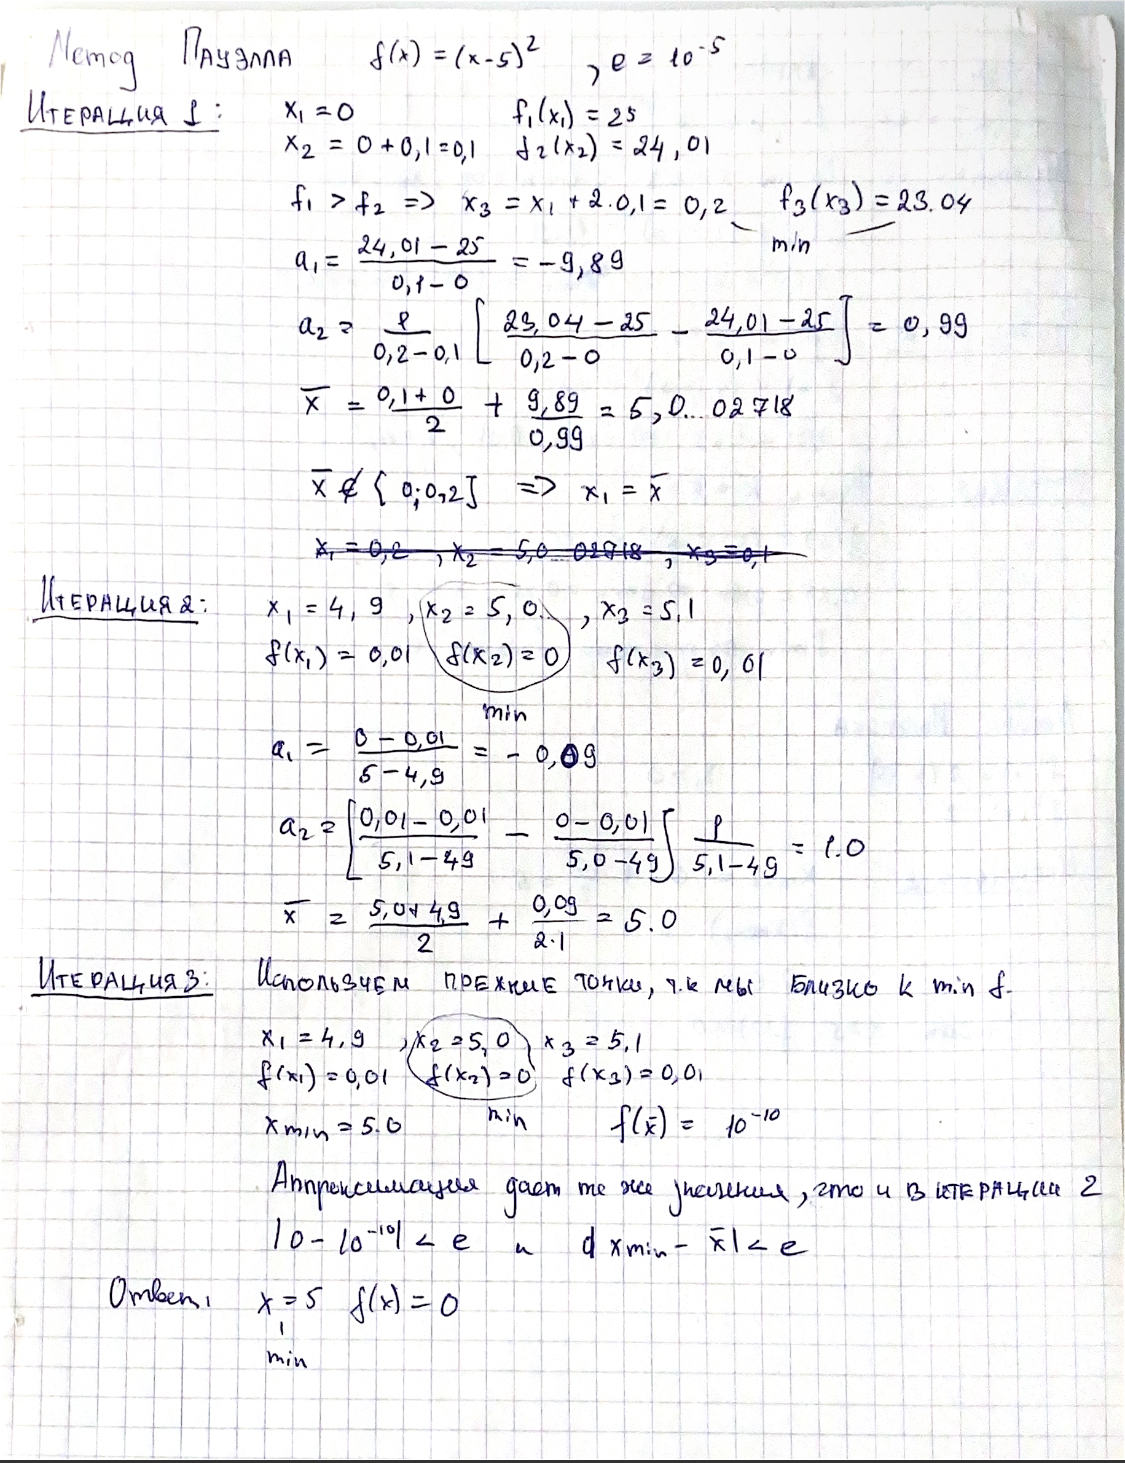

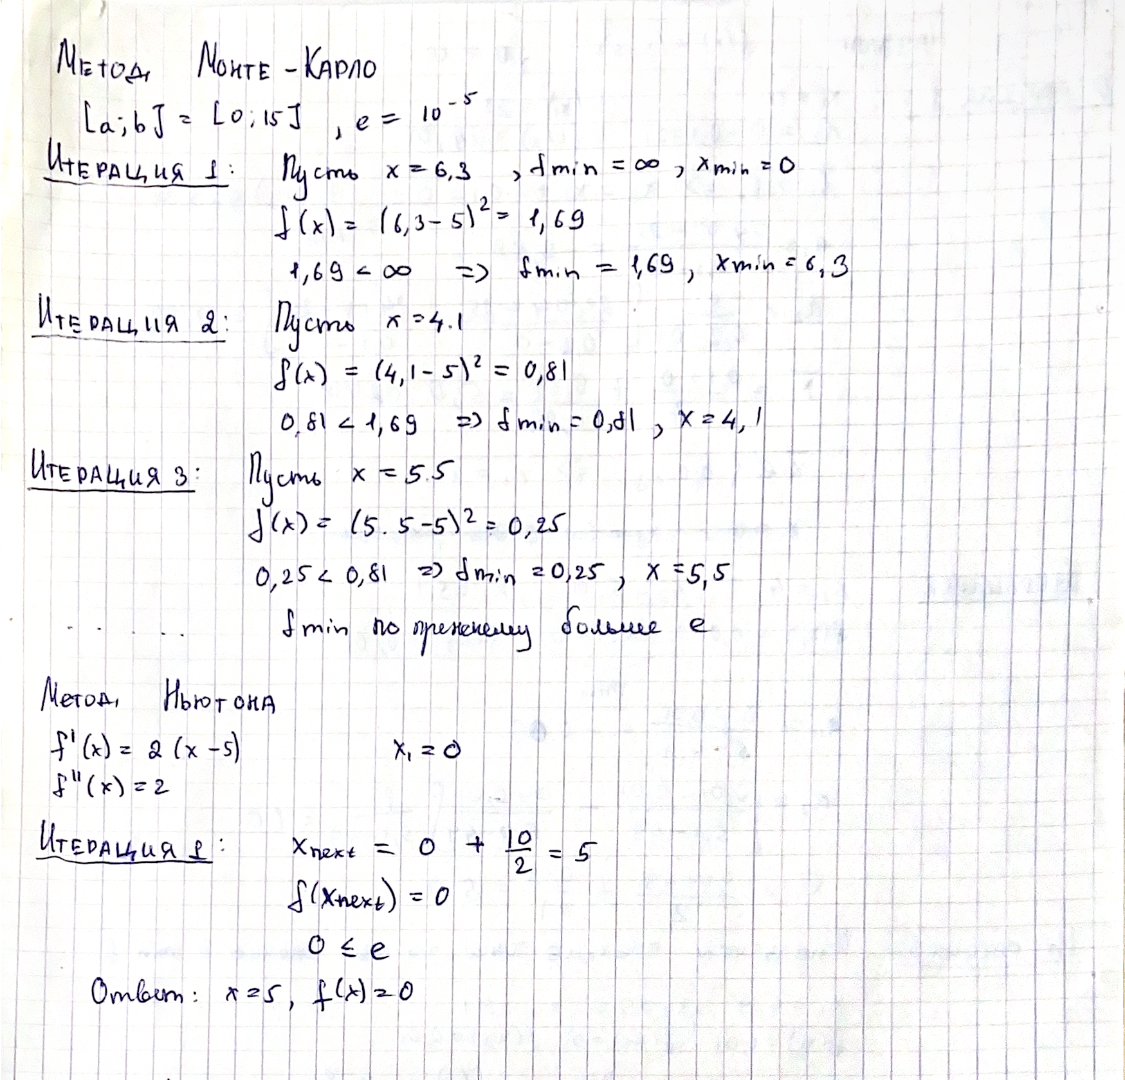